In [1]:
import sys

sys.path.append("..")

import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path
from logger import logger
from device_manager import DeviceManager, collapse_path

CONNECT = False

In [2]:
if CONNECT:
    dvm = DeviceManager()
    device = dvm.get_device()

In [3]:
LOCAL_SAVE_DIR = Path("STORE/")
LOCAL_SAVE_DIR.mkdir(exist_ok=True)

JSON_FILE = "game"
LOCAL_JSON_PATH = LOCAL_SAVE_DIR / JSON_FILE

In [4]:
if CONNECT:
    REMOTE_JSON_PATH = dvm.get_save_path(JSON_FILE)
    logger.info(f"Located JSON file at {REMOTE_JSON_PATH.parents[1]}")

In [5]:
if CONNECT:
    sftp = device.open_sftp()
    sftp.get(REMOTE_JSON_PATH.as_posix().rstrip(), LOCAL_JSON_PATH)
    logger.info(f"Copied {collapse_path(REMOTE_JSON_PATH)} to {LOCAL_JSON_PATH}")

In [6]:
if CONNECT:
    sftp.close()
    dvm.release()

In [7]:
with open(LOCAL_JSON_PATH, 'r') as file:
    data = json.load(file)

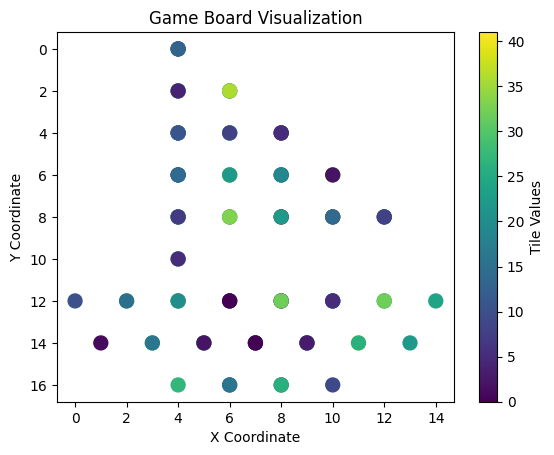

In [8]:
# Extract initial board data
initial_board = data['game']['initialBoard']['tiles']

# Prepare data for plotting
coordinates = []
values = []

for tile in initial_board:
    x = tile['key']['x']
    y = tile['key']['y']
    for val in tile['value']:
        coordinates.append((x, y))
        values.append(val['value']['value'])

# Create the plot
fig, ax = plt.subplots()
scatter = ax.scatter([coord[0] for coord in coordinates], [coord[1] for coord in coordinates], c=values, cmap='viridis', s=100)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Tile Values')

# Set plot title and labels
ax.set_title('Game Board Visualization')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.show()

Number Playable Tiles: 26


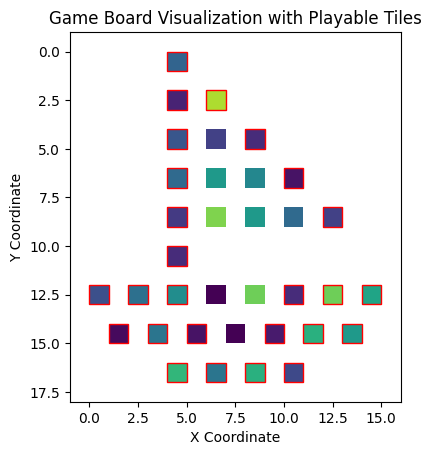

In [9]:
import matplotlib.patches as patches

# Extract initial board data
initial_board = data['game']['initialBoard']['tiles']

# Create a dictionary to store the tiles by coordinates
tiles = {}
for tile in initial_board:
    x = tile['key']['x']
    y = tile['key']['y']
    for val in tile['value']:
        z = val['key']
        value = val['value']['value']
        tiles[(x, y, z)] = value

# Function to check if a tile is playable
def is_playable(tiles, x, y, z):
    not_covered = all((x, y, z + 1) != (i, j, k) for i, j, k in tiles)    
    left_open = all((x - 2, y, z) != (i, j, k) for i, j, k in tiles)
    right_open = all((x + 2, y, z) != (i, j, k) for i, j, k in tiles)

    # print(f"({x},{y},{z}): Left ({left_open}), Right ({right_open}), Not Covered ({not_covered})")
    return not_covered and (left_open or right_open)

# Prepare data for plotting
x_coords = []
y_coords = []
values = []
playable = []

for (x, y, z), value in tiles.items():
    x_coords.append(x)
    y_coords.append(y)
    values.append(value)
    playable.append(is_playable(tiles, x, y, z))

# Create a 2D plot
fig, ax = plt.subplots()

# Plot each tile
for x, y, value, play in zip(x_coords, y_coords, values, playable):
    rect = patches.Rectangle((x, y), 1, 1, linewidth=1, facecolor=plt.cm.viridis(value / max(values)))
    ax.add_patch(rect)

# Set plot limits and labels
ax.set_xlim(min(x_coords) - 1, max(x_coords) + 2)
ax.set_ylim(min(y_coords) - 1, max(y_coords) + 2)
ax.set_aspect('equal')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

print("Number Playable Tiles:", len(list(filter(lambda x: is_playable(tiles, *x), [_ for _ in tiles]))))

plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.show()

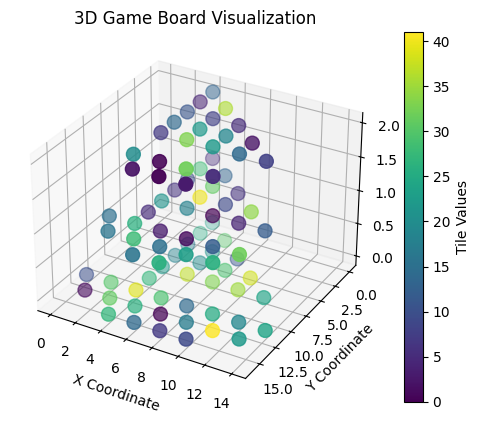

In [10]:
# Extract initial board data
initial_board = data['game']['initialBoard']['tiles']

# Prepare data for plotting
x_coords = []
y_coords = []
z_coords = []
values = []

for tile in initial_board:
    x = tile['key']['x']
    y = tile['key']['y']
    for val in tile['value']:
        z = val['key']
        value = val['value']['value']
        x_coords.append(x)
        y_coords.append(y)
        z_coords.append(z)
        values.append(value)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(x_coords, y_coords, z_coords, c=values, cmap='viridis', s=100)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Tile Values')

# Set plot title and labels
ax.set_title('3D Game Board Visualization')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.show()

In [11]:
with open(LOCAL_JSON_PATH, 'r') as file:
    data = json.load(file)

# Extract initial board data
initial_board = data['game']['initialBoard']['tiles']

# Create a dictionary to map coordinates to their values
tiles_dict = {}
for tile in initial_board:
    x = tile['key']['x']
    y = tile['key']['y']
    for val in tile['value']:
        z = val['key']
        value = val['value']['value']
        tiles_dict[(x, y, z)] = value

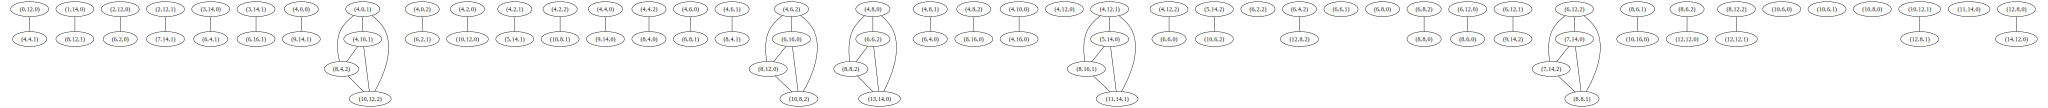

In [12]:
# from graphviz import Graph

# graph = Graph()

# for key in tiles_dict:
#     graph.node(str(key), label=str(key))

# keys_list = list(tiles_dict)
# for i in range(len(tiles_dict)):
#     for j in range(i + 1, len(tiles_dict)):
#         if tiles_dict[keys_list[i]] == tiles_dict[keys_list[j]]:
#             graph.edge(str(keys_list[i]), str(keys_list[j]))

# graph.render(filename=LOCAL_SAVE_DIR / "graph", format="jpg")
# graph

In [13]:
with open(LOCAL_JSON_PATH, 'r') as file:
    data = json.load(file)

# Extract initial board data
initial_board = data['game']['initialBoard']['tiles']

# Create a dictionary to map coordinates to their values
tiles_dict = {}
for tile in initial_board:
    x = tile['key']['x']
    y = tile['key']['y']
    for val in tile['value']:
        z = val['key']
        value = val['value']['value']
        tiles_dict[(x, y, z)] = value

In [ ]:
def is_playable(tile, tiles):
    x, y, z = tile

    not_covered = all((x, y, z + 1) != (i, j, k) for i, j, k in tiles)    
    left_open = all((x - 2, y, z) != (i, j, k) for i, j, k in tiles)
    right_open = all((x + 2, y, z) != (i, j, k) for i, j, k in tiles)

    # print(f"({x},{y},{z}): Left ({left_open}), Right ({right_open}), Not Covered ({not_covered})")
    return not_covered and (left_open or right_open)

def get_playable_tiles(tiles):
    return list([tile for tile in tiles if is_playable(tile, tiles)])

def get_matching_playable_tiles(k_tile, tiles):
    neighbors = []
    v_tile = tiles[k_tile]
    for k_match, v_match in tiles.items():
        # checks not identical tile, same values, and is playable
        if k_tile != k_match and v_tile == v_match and is_playable(k_match, tiles):
            neighbors.append(k_match)
    return neighbors

def failed(tiles):
    return not any(is_playable(tile, tiles) for tile in tiles)

# import random

current_tiles = tiles_dict.copy()
visited = []

def solve_dfs(current_tiles, moves=[]):
    if not current_tiles:
        return moves
    playable_tiles = get_playable_tiles(current_tiles)
    # random.shuffle(playable_tiles)
    for p_tile in playable_tiles:
        for m_tile in get_matching_playable_tiles(p_tile, current_tiles):
            next_tiles = current_tiles.copy()
            del next_tiles[p_tile]
            del next_tiles[m_tile]
            moves.append(f"Move: {p_tile} - {m_tile}")
            solve_dfs(next_tiles, moves)

solve_dfs(current_tiles)